# IMPORTING LIBRARIES

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [125]:
from sklearn.linear_model import LinearRegression

### Importing for different plots 

In [126]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import month_plot

# READING DATASET

In [127]:
df = pd.read_csv('RetailFood.csv')
df.head()

,Year,Month,Food
0,1992,Jan,164083
1,1992,Feb,164260
2,1992,Mar,163747
3,1992,Apr,164759
4,1992,May,165617


In [128]:
df.tail()

,Year,Month,Food
305,2017,Jun,474488
306,2017,Jul,476752
307,2017,Aug,476513
308,2017,Sep,485419
309,2017,Oct,486553


In [129]:
df.shape

(310, 3)

# EXPLORATORY DATA ANALYSIS

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 3 columns):
Year     310 non-null int64
Month    310 non-null object
Food     310 non-null int64
dtypes: int64(2), object(1)
memory usage: 7.3+ KB


In [131]:
df.describe()

,Year,Food
count,310.000000,310.000000
mean,2004.419355,318020.748387
std,7.468485,89200.008495
min,1992.000000,163747.000000
25%,1998.000000,237147.000000
50%,2004.000000,328397.000000
75%,2011.000000,380697.500000
max,2017.000000,486553.000000


Printing the date ranges availability

In [132]:
print(f"Date Range available from - {df.loc[:,'Year'][0]} to {df.loc[:,'Year'][len(df)-1]}")

Date Range available from - 1992 to 2017


In [133]:
date = pd.date_range(start='1/1/1992',end = '31/10/2017',freq='M')
date

DatetimeIndex(['1992-01-31', '1992-02-29', '1992-03-31', '1992-04-30',
               '1992-05-31', '1992-06-30', '1992-07-31', '1992-08-31',
               '1992-09-30', '1992-10-31',
               ...
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31'],
              dtype='datetime64[ns]', length=310, freq='M')

In [134]:

df.drop(['Year','Month'],axis=1,inplace=True)

df.head()

,Food
0,164083
1,164260
2,163747
3,164759
4,165617


In [135]:
df['Month']=date
df=df.set_index('Month')
df.head()

,Food
Month,
1992-01-31,164083
1992-02-29,164260
1992-03-31,163747
1992-04-30,164759
1992-05-31,165617


## Plot

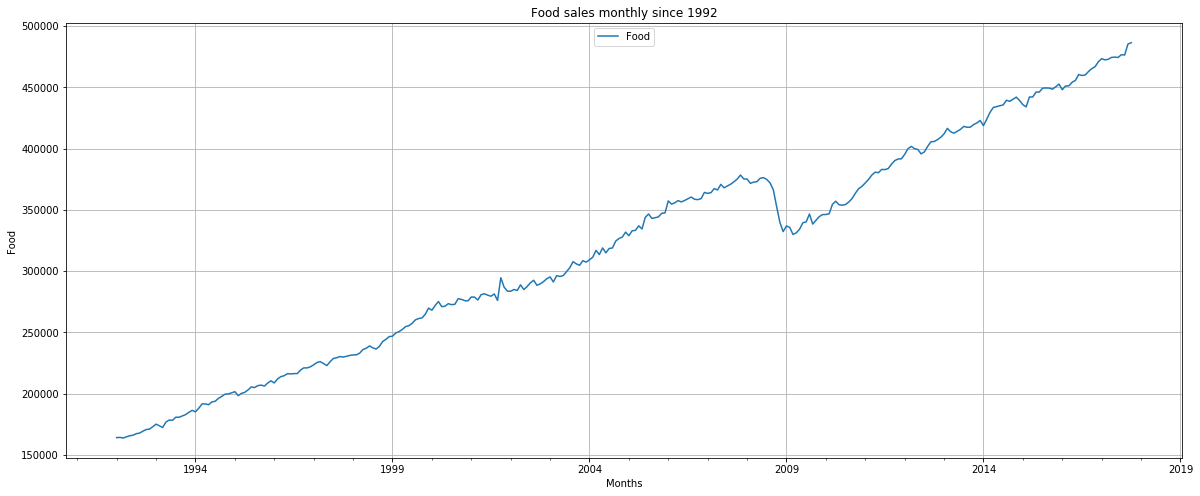

In [136]:
df.plot(figsize=(20,8))
plt.title('Food sales monthly since 1992')
plt.xlabel('Months')
plt.ylabel('Food')
plt.legend(loc='upper center')
plt.grid()

In [137]:
round(df.describe(),3)

,Food
count,310.000
mean,318020.748
std,89200.008
min,163747.000
25%,237147.000
50%,328397.000
75%,380697.500
max,486553.000


## Boxplot 

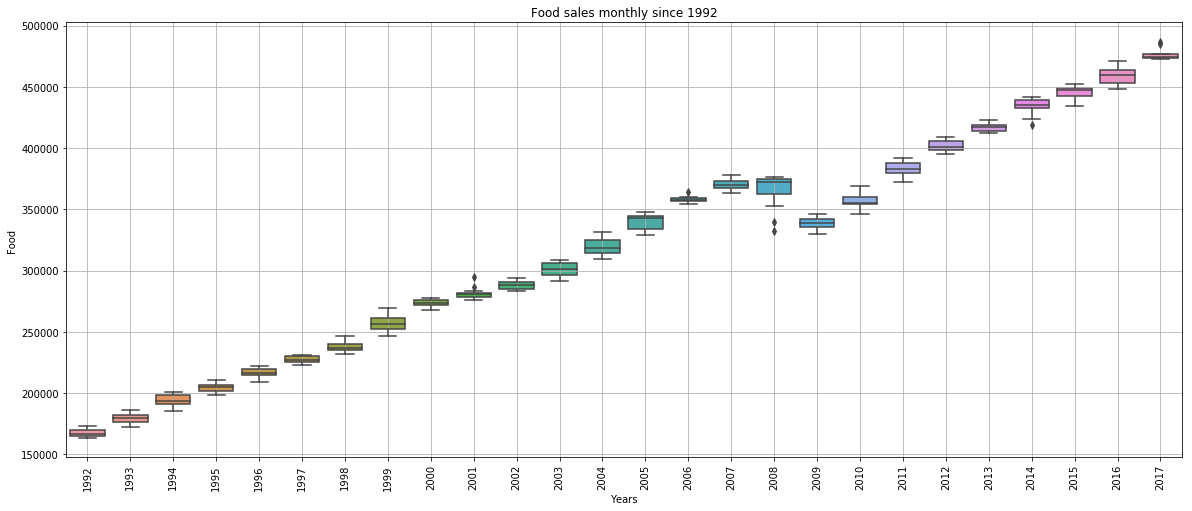

In [138]:
_,ax = plt.subplots(figsize=(20,8))
sns.boxplot(x =df.index.year, y=df.values[:,0],ax=ax)
plt.title('Food sales monthly since 1992')
plt.xlabel('Years')
plt.ylabel('Food')
# plt.legend(loc='upper center')
plt.xticks(rotation=90)
plt.grid()

## Statsmodels 

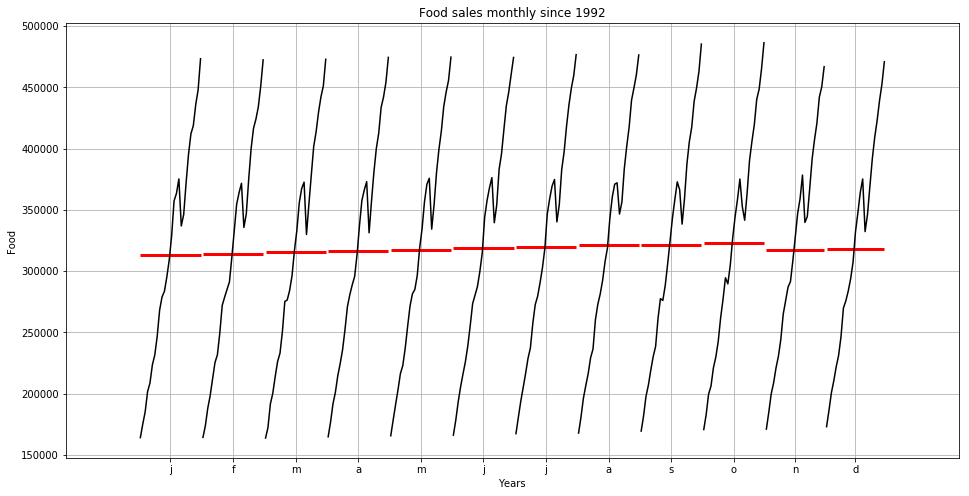

In [139]:
fig, ax = plt.subplots(figsize=(16,8))
month_plot(df,ylabel = 'Food' ,ax = ax)
plt.title('Food sales monthly since 1992')
plt.xlabel('Years')
plt.ylabel('Food')
plt.grid()

## Boxplot 

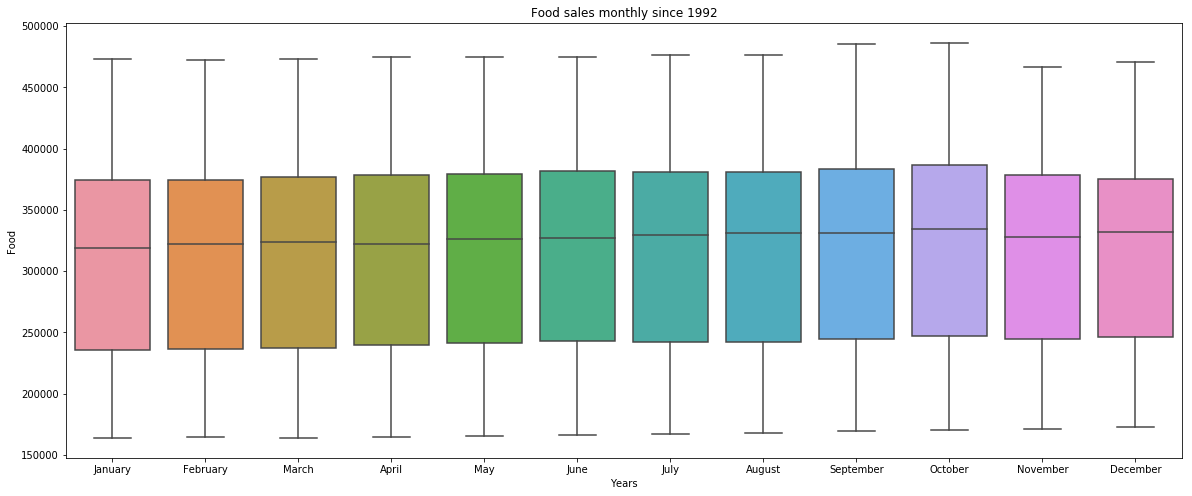

In [140]:
_,ax = plt.subplots(figsize=(20,8))
sns.boxplot(x =df.index.month_name(), y=df.values[:,0],ax=ax)
plt.title('Food sales monthly since 1992')
plt.xlabel('Years')
plt.ylabel('Food')
plt.show()

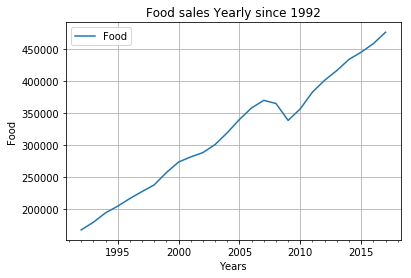

In [141]:
df_anl_avg = df.resample('A').mean()
df_anl_avg.plot()
plt.title('Food sales Yearly since 1992')
plt.xlabel('Years')
plt.ylabel('Food')
plt.grid()

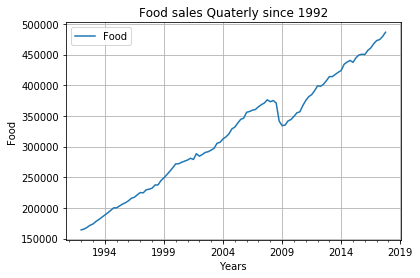

In [142]:
df_qut_avg = df.resample('Q').mean()
df_qut_avg.plot()
plt.title('Food sales Quaterly since 1992')
plt.xlabel('Years')
plt.ylabel('Food')
plt.grid()

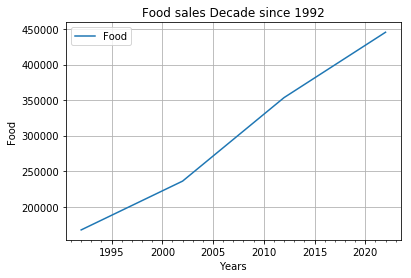

In [143]:
df_dec_avg = df.resample('10Y').mean()
df_dec_avg.plot()
plt.title('Food sales Decade since 1992')
plt.xlabel('Years')
plt.ylabel('Food')
plt.grid()

In [144]:
df1=df.groupby(df.index.year).mean().rename(columns={'Food':'Mean'})
df1=df1.merge(df.groupby(df.index.year).std().rename(columns={'Food':'Std'}), left_index=True, right_index =True)
df1['Cov']=((df1['Std']/df1['Mean'])*100).round(3)
df1.head()

,Mean,Std,Cov
Month,,,
1992,167314.500000,3095.043589,1.850
1993,179319.500000,4347.677217,2.425
1994,194017.250000,4884.056904,2.517
1995,204455.166667,3631.637393,1.776
1996,216458.250000,3914.980207,1.809


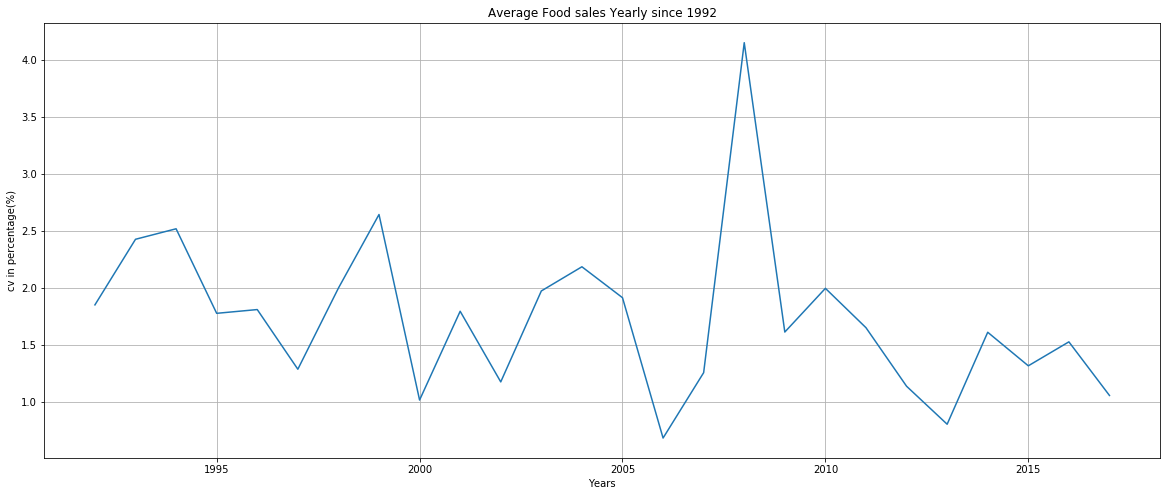

In [145]:
fig, ax = plt.subplots(figsize=(20,8))
df1['Cov'].plot()
plt.title('Average Food sales Yearly since 1992')
plt.xlabel('Years')
plt.ylabel('cv in percentage(%)')
plt.grid()

## MODEL IMPLIMENTATION 

In [146]:
train = df[df.index.year < 2013]
test = df[df.index.year >= 2013]

In [147]:
print(train.shape)
print(test.shape)

(252, 1)
(58, 1)


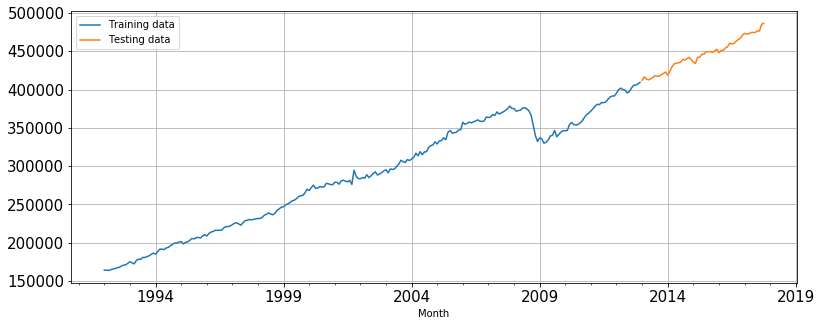

In [148]:
train['Food'].plot(figsize=(13,5),fontsize=15)
test['Food'].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(['Training data','Testing data'])
plt.show()

## Linear Regression 

In [149]:
train_time = [i for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print(len(train_time),len(test_time))

252 58


In [150]:
lr_train = train.copy()
lr_test = test.copy()

In [151]:
lr_train['Time']=train_time
lr_test['Time']=test_time

In [152]:
lr=LinearRegression()
lr.fit(lr_train[['Time']],lr_train['Food'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

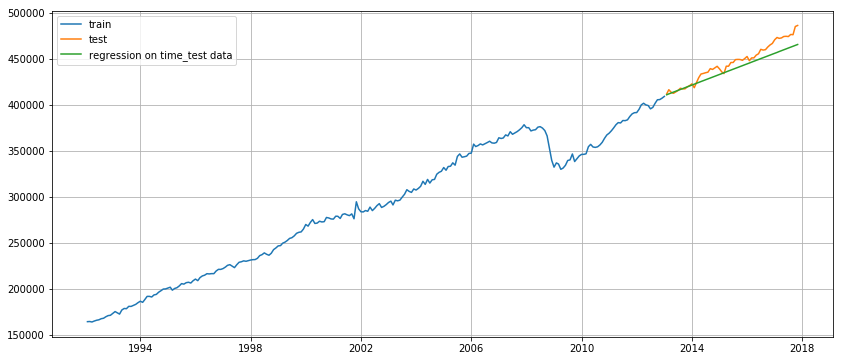

In [153]:
test_pred= lr.predict(lr_test[['Time']])
lr_test['Forecast']=test_pred

plt.figure(figsize=(14,6))
plt.plot(train['Food'], label='train')
plt.plot(test['Food'], label='test')
plt.plot(lr_test['Forecast'], label='regression on time_test data')
plt.legend(loc='best')
plt.grid()


In [154]:
def mape(actual,pred):
    return round((np.mean(abs(actual-pred)/actual))*100 , 2)


In [155]:
lr_mape = mape(test["Food"].values, test_pred)
print('Mean Absolute Percentage Error is %3.3f'%(lr_mape),'%')

Mean Absolute Percentage Error is 1.590 %


In [156]:
results =pd.DataFrame({'TestMape(%)' : [lr_mape]}, index=['RegressionOnTime'])
results

,TestMape(%)
RegressionOnTime,1.59


## Navie Bayes 

In [157]:
nv_train = train.copy()
nv_test = test.copy()

In [158]:
nv_test['naive'] = np.asarray(train['Food'])[len(np.asarray(train['Food']))-1]
nv_test['naive'].head()

Month
2013-01-31    409343
2013-02-28    409343
2013-03-31    409343
2013-04-30    409343
2013-05-31    409343
Name: naive, dtype: int64

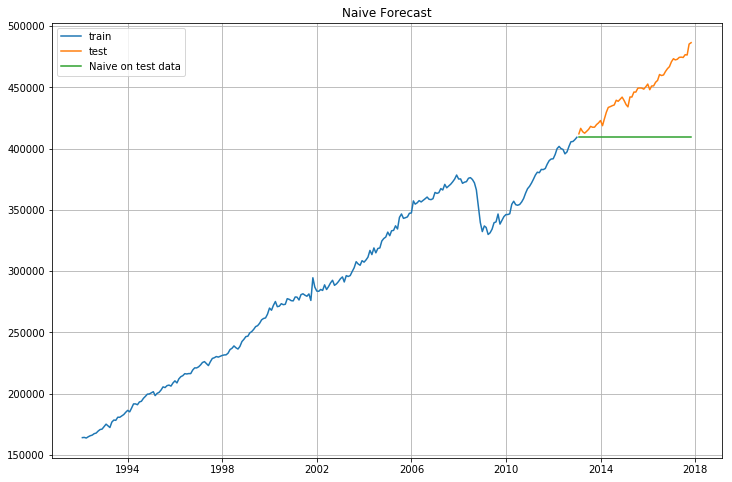

In [159]:
plt.figure(figsize=(12,8))
plt.plot(nv_train['Food'], label='train')
plt.plot(test['Food'], label='test')
plt.plot(nv_test['naive'], label='Naive on test data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid()


In [160]:
nv_mape = mape(test["Food"].values, nv_test['naive'].values)
print('Mean Absolute Percentage Error is %3.3f'%(nv_mape),'%')

Mean Absolute Percentage Error is 7.910 %


In [161]:
results_df2 =pd.DataFrame({'TestMape(%)' : [nv_mape]}, index=['NaiveModel'])
results = pd.concat([results,results_df2])
results

,TestMape(%)
RegressionOnTime,1.59
NaiveModel,7.91


In [162]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


final_model = ExponentialSmoothing(df, trend='additive', seasonal='additive', seasonal_periods=seasonal_periods).fit(smoothing_level=0.4,  smoothing_seasonal=0.6)


In [163]:
Map_final_model = mape(df['Food'].values,final_model.fittedvalues)
print('MAPE:',Map_final_model)

MAPE: 0.97


In [164]:
pred=final_model.forecast(steps = len(test))

In [165]:
pred_df = pd.DataFrame({'lower': pred -1.96* np.std(final_model.resid , ddof =1),
                      'prediction':pred,
                      'upper': pred + 1.96* np.std(final_model.resid , ddof =1)})
pred_df.head()

,lower,prediction,upper
2017-11-30,475052.649119,483929.212281,492805.775444
2017-12-31,477540.083850,486416.647013,495293.210176
2018-01-31,476485.341960,485361.905122,494238.468285
2018-02-28,474965.450107,483842.013270,492718.576433
2018-03-31,476168.522906,485045.086069,493921.649231


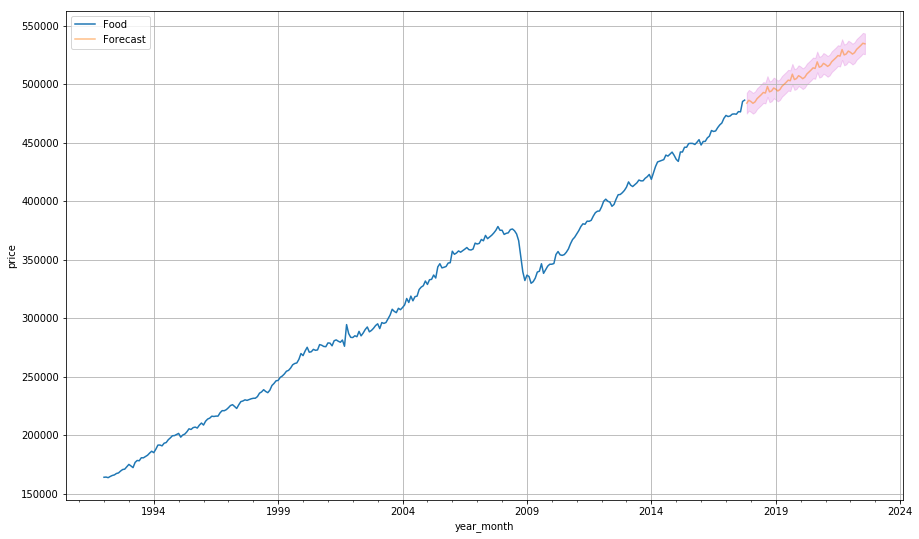

In [166]:
axis = df.plot(label = 'Actual', figsize=(15,9))
pred_df['prediction'].plot(ax = axis, label ='Forecast', alpha= 0.5)
axis.fill_between(pred_df.index, pred_df['lower'],pred_df['upper'],color = 'm', alpha = .15)
axis.set_xlabel('year_month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()